# COVID-19 analysis
### Johns Hopkins University data

In [75]:
from read_data import clean_data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.set()

In [3]:
# read dayly reports from Johns Hopkins University into one data frame
df = clean_data()

In [4]:
df.head()

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Date
0,Hubei,Mainland China,64287.0,2495.0,16748.0,2020-02-24
1,Guangdong,Mainland China,1345.0,6.0,786.0,2020-02-24
2,Henan,Mainland China,1271.0,19.0,943.0,2020-02-24
3,Zhejiang,Mainland China,1205.0,1.0,782.0,2020-02-24
4,Hunan,Mainland China,1016.0,4.0,731.0,2020-02-24


### Data wrangling

In [8]:
# we don't care about Province/state
countries = df.groupby(['Date','Country_Region'], as_index=False).agg({'Confirmed': sum, 'Deaths': sum, 'Recovered': sum})

In [9]:
countries.head()

,Date,Country_Region,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Japan,2.0,0.0,0.0
2,2020-01-22,Macau,1.0,0.0,0.0
3,2020-01-22,Mainland China,547.0,17.0,28.0
4,2020-01-22,South Korea,1.0,0.0,0.0


In [10]:
# check
# df[df['Country_Region']=='Mainland China'].sort_values('Date').head(31).sum()

In [11]:
countries.Country_Region.sort_values().unique()

array([' Azerbaijan', 'Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahamas, The',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Timor', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Est

### Cleaning tasks
- unify china and mainland china
- delete space in Azerbaijan
- unify Bahamas ; Bahamas, The and The Bahamas
- unify Diamond princess, MS zaandam and Cruise ship
- unify Gambia and Gambia, The
- unify Hong Kong and Hong Kong SAR
- unify Iran and Iran (Islamic Republic of)
- unify Korea, South ; South Korea and Republic of Korea
- unify Macao SAR and Macau
- unify Moldova and Republic of Moldova
- unify Congo (Brazzaville) and Republic of the Congo
- unify Russia and Russia Federation
- unify st. martin and saint martin
- unify Taiwan and Taiwan*
- unify Gambia and The Gambia
- unify United Kingdom and UK
- unify Viet Nam and Vietnam
- unify West Bank and Gaza, and occupied Palestinian territory

In [12]:
unify = {'Mainland China':'China', ' Azerbaijan': 'Azerbaijan', 'Bahamas, The':'Bahamas', 'The Bahamas':'Bahamas',
        'Diamond Princess':'Cruise Ship', 'MS Zaandam':'Cruise Ship', 'Gambia, The':'Gambia',
        'Hong Kong SAR':'Hong Kong', 'Iran (Islamic Republic of)':'Iran', 'Korea, South': 'South Korea',
        'Republic of Korea':'South Korea', 'Macao SAR':'Macau', 'Republic of Moldova':'Moldova',
        'Republic of the Congo': 'Congo (Brazzaville)', 'Russia Federation':'Russia', 'St. Martin':'Saint Martin',
        'Taiwan*':'Taiwan', 'The Gambia':'Gambia', 'United Kingdom': 'UK', 'Viet Nam':'Vietnam', 
        'occupied Palestinian territory':'West Bank and Gaza'}

In [13]:
countries.Country_Region.replace(unify, inplace=True)

In [14]:
countries.Country_Region.sort_values().unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czech Republic', 'Czechia', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fi

In [15]:
len(countries.Country_Region.sort_values().unique())

217

In [48]:
clean = countries.groupby(['Date','Country_Region'], as_index=False).agg({'Confirmed': sum, 'Deaths': sum, 'Recovered': sum})

In [49]:
#rename column
clean.rename(columns={'Country_Region':'Country'}, inplace=True)

In [50]:
clean.head()

,Date,Country,Confirmed,Deaths,Recovered
0,2020-01-22,China,547.0,17.0,28.0
1,2020-01-22,Hong Kong,0.0,0.0,0.0
2,2020-01-22,Japan,2.0,0.0,0.0
3,2020-01-22,Macau,1.0,0.0,0.0
4,2020-01-22,South Korea,1.0,0.0,0.0


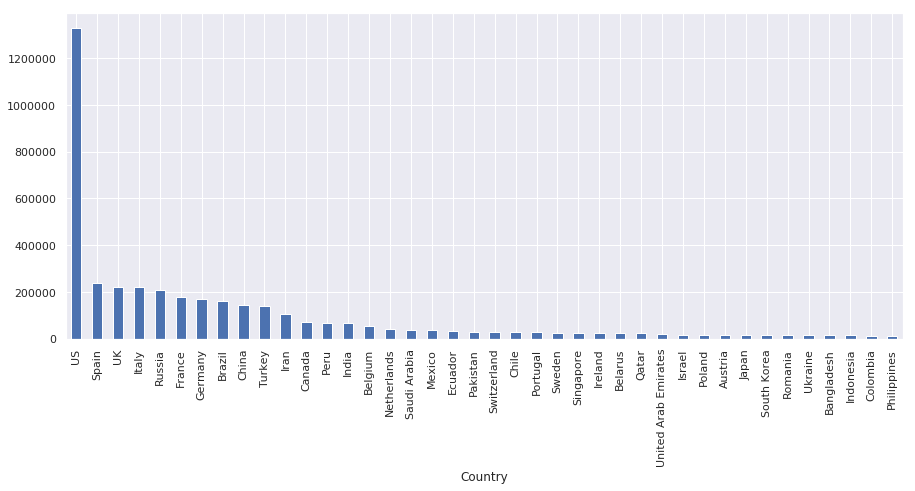

In [18]:
clean.groupby('Country').Confirmed.max().sort_values(ascending=False)[0:40].plot(kind='bar',figsize=(15,6))

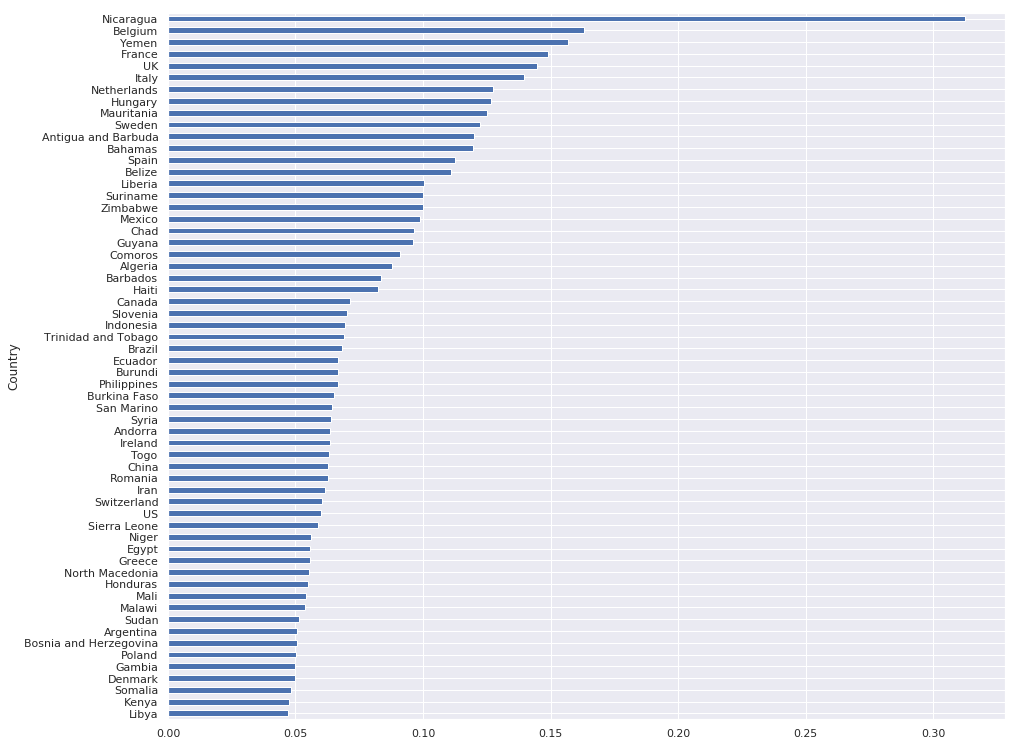

In [19]:
(clean.groupby('Country').Deaths.max()/clean.groupby('Country').Confirmed.max()).sort_values(ascending=False)[0:60].sort_values().plot(kind='barh',figsize=(15,13));

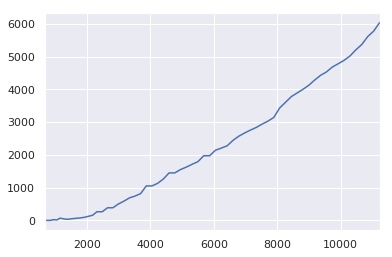

In [22]:
clean[clean.Country=='Argentina'].Confirmed.plot()

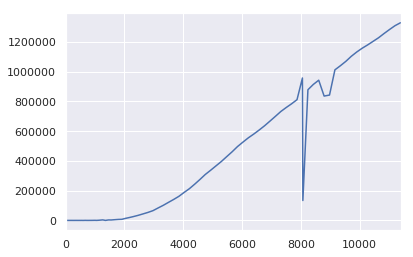

In [23]:
clean[clean.Country=='US'].Confirmed.plot()

In [27]:
clean.groupby(['Country','Date']).Confirmed.mean()

Country      Date      
Afghanistan  2020-02-24     13.0
             2020-03-08      8.0
             2020-03-10      5.0
             2020-03-11     21.0
             2020-03-14     11.0
             2020-03-15     16.0
             2020-03-16     21.0
             2020-03-17     66.0
             2020-03-20     48.0
             2020-03-22     40.0
             2020-03-23     40.0
             2020-03-24     74.0
             2020-03-25     84.0
             2020-03-26     94.0
             2020-03-27    110.0
             2020-03-28    110.0
             2020-03-29    120.0
             2020-03-30    170.0
             2020-03-31    174.0
             2020-04-01    237.0
             2020-04-02    273.0
             2020-04-03    281.0
             2020-04-04    299.0
             2020-04-05    349.0
             2020-04-06    367.0
             2020-04-07    423.0
             2020-04-08    444.0
             2020-04-09    484.0
             2020-04-10    521.0
             2020-0

### Wrong data
Since the data is the accumulated one, should always be increasing. For many countries this is not the case.

In [35]:
countries_list = clean.Country.sort_values().unique()

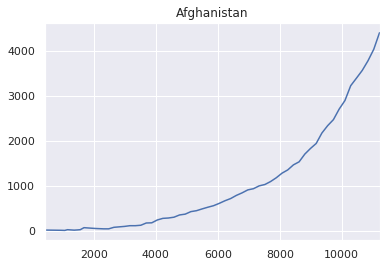

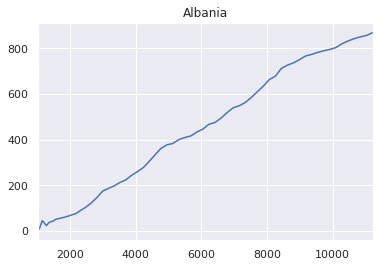

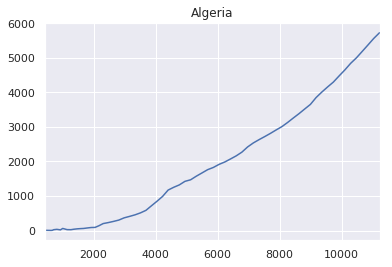

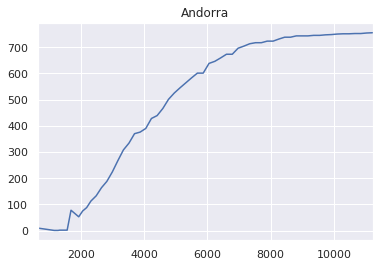

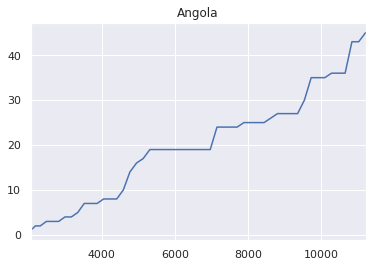

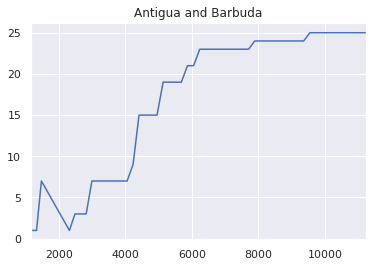

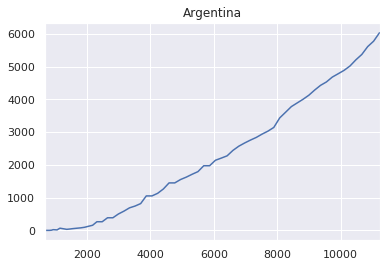

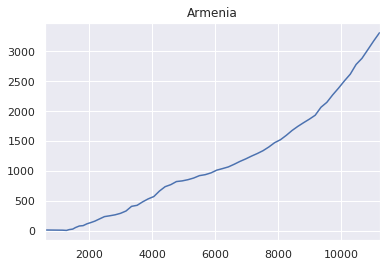

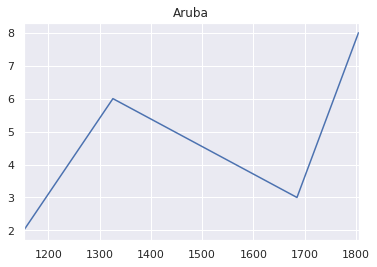

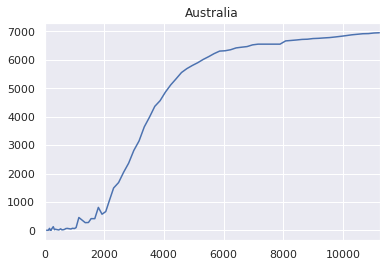

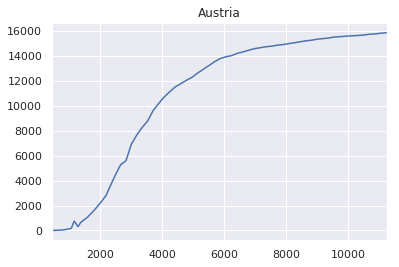

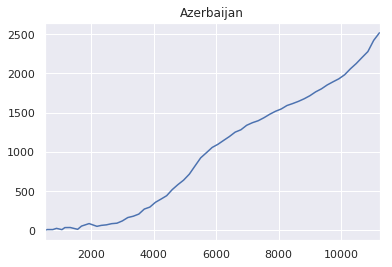

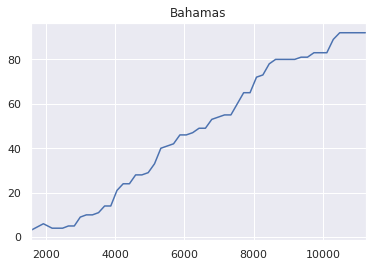

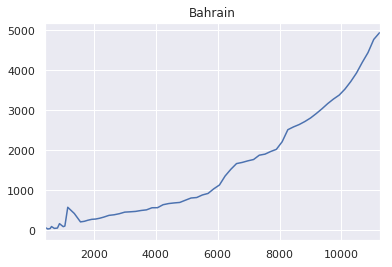

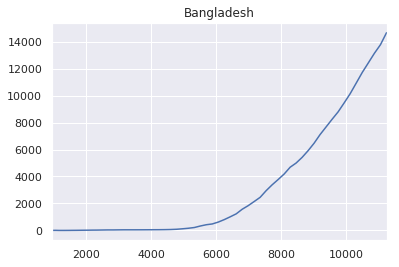

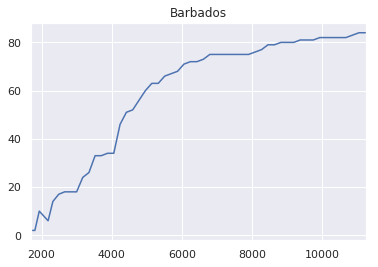

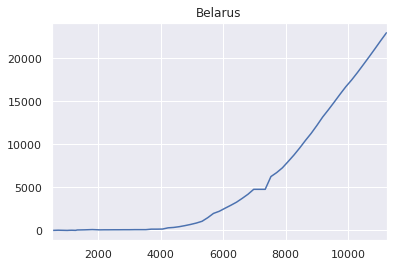

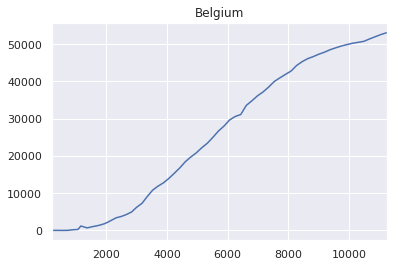

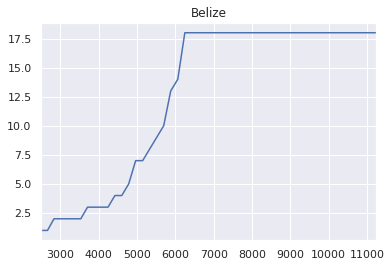

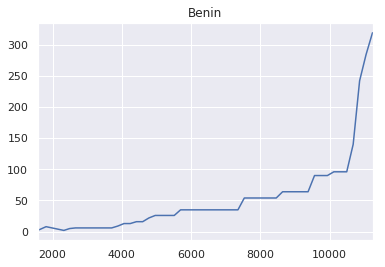

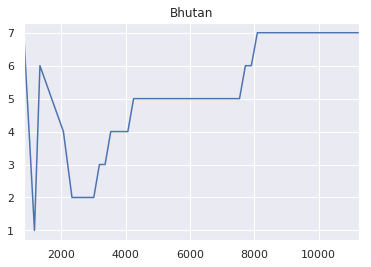

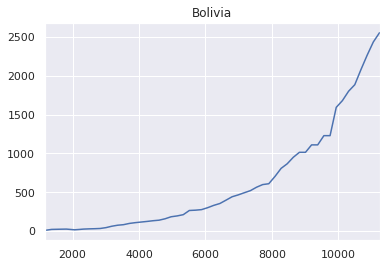

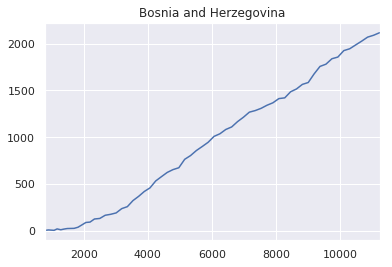

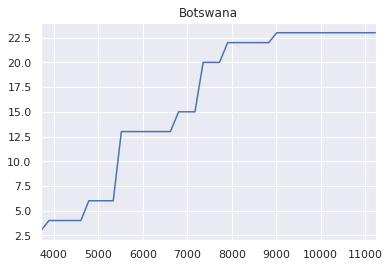

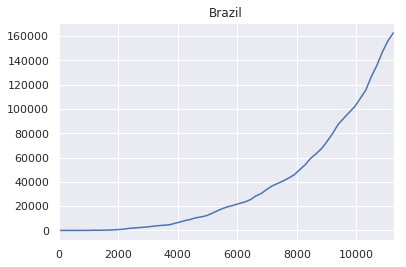

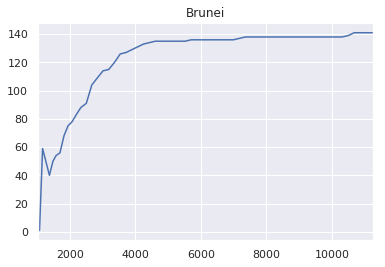

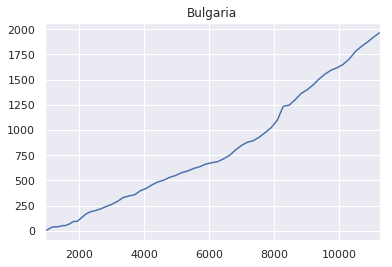

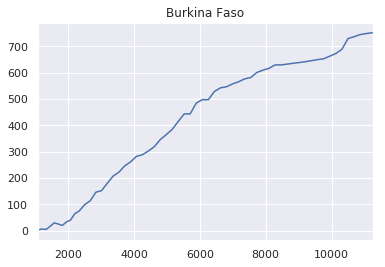

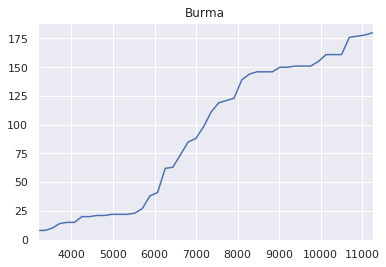

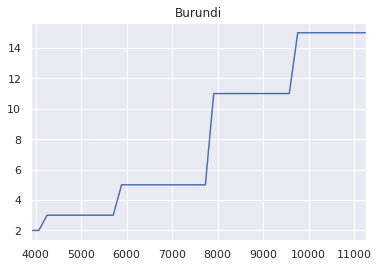

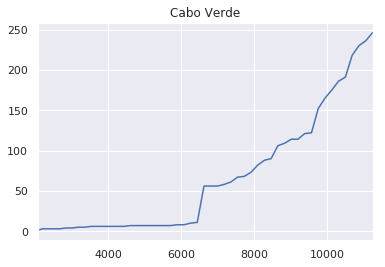

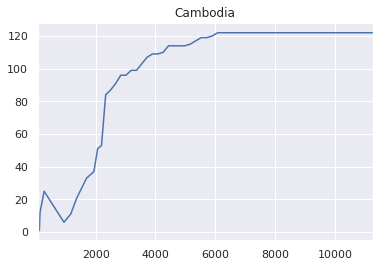

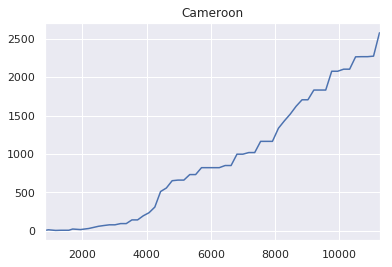

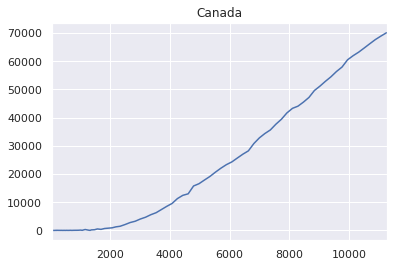

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2200.0, right=2200.0
  ax.set_xlim(left, right)


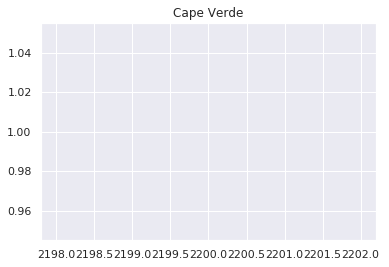

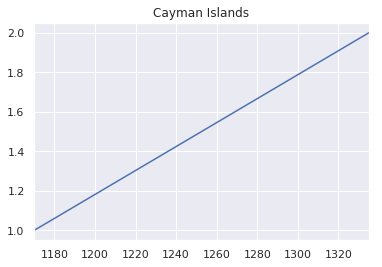

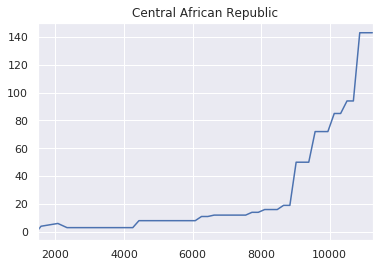

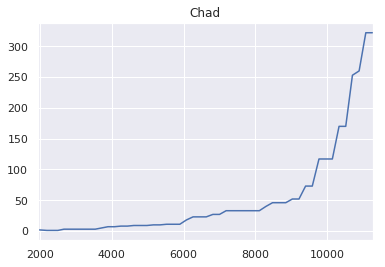

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1072.0, right=1072.0
  ax.set_xlim(left, right)


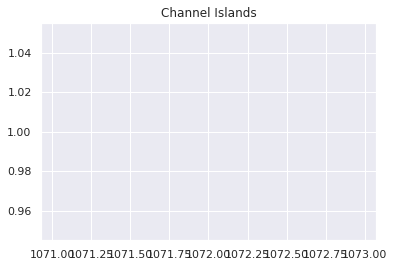

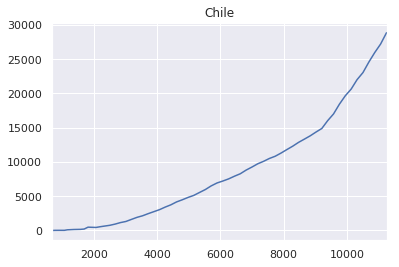

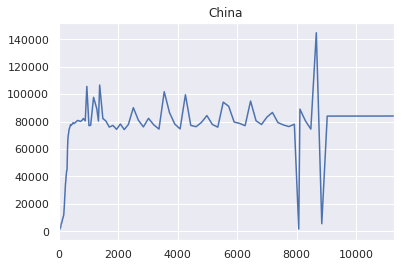

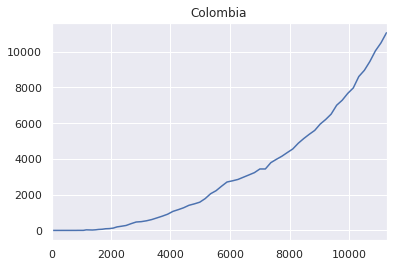

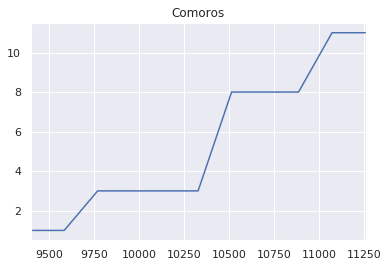

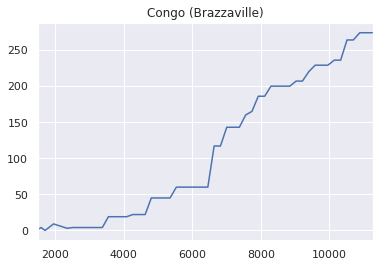

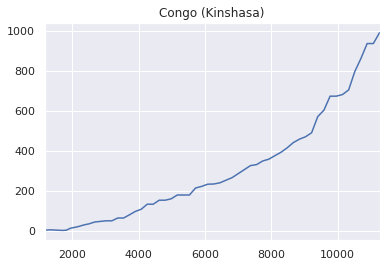

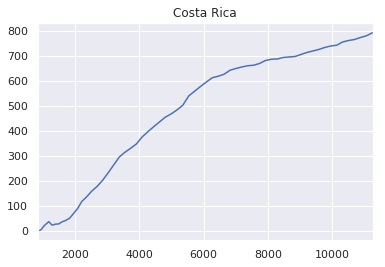

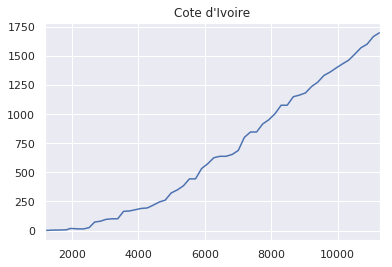

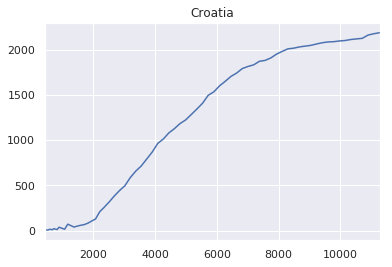

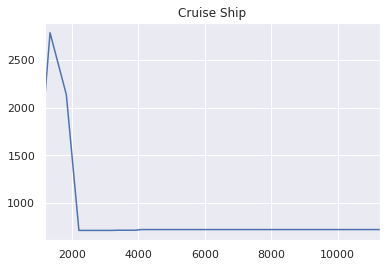

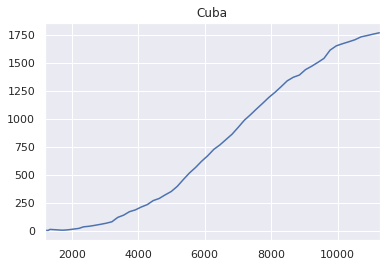

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1381.0, right=1381.0
  ax.set_xlim(left, right)


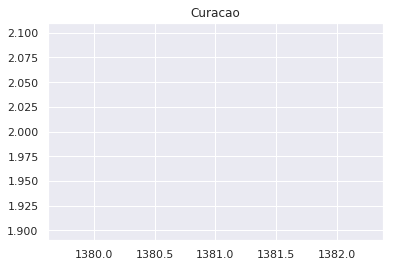

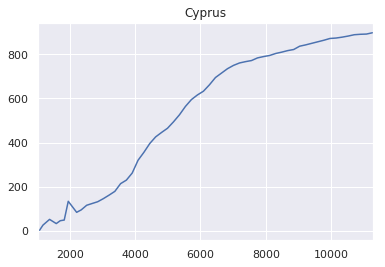

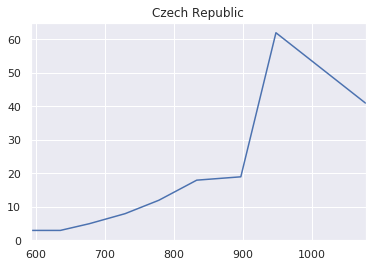

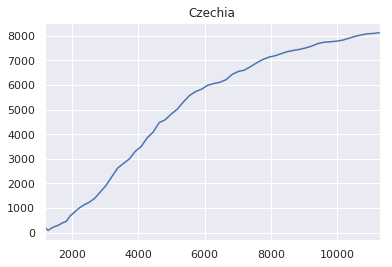

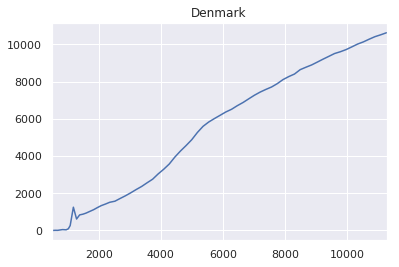

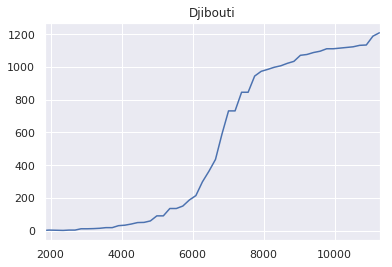

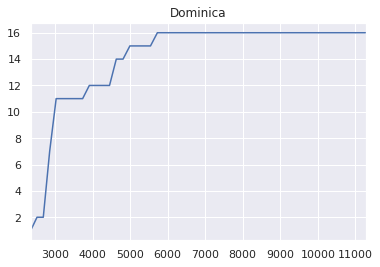

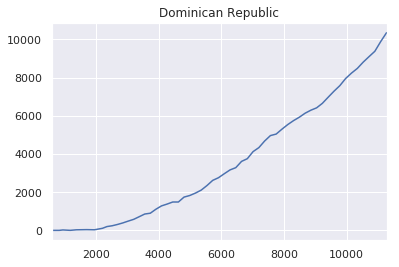

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2215.0, right=2215.0
  ax.set_xlim(left, right)


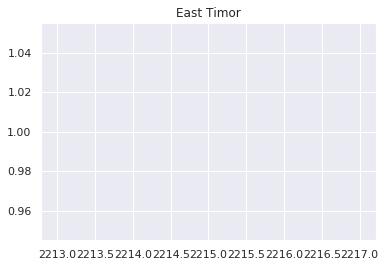

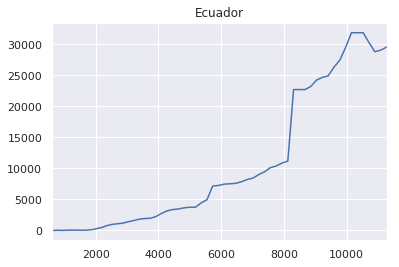

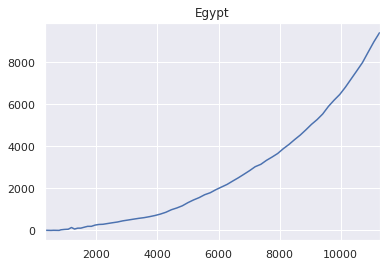

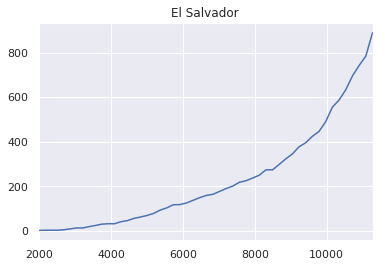

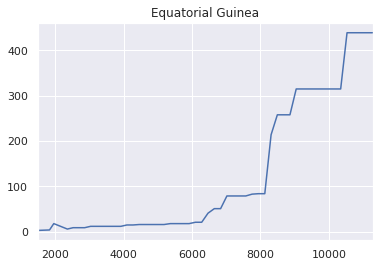

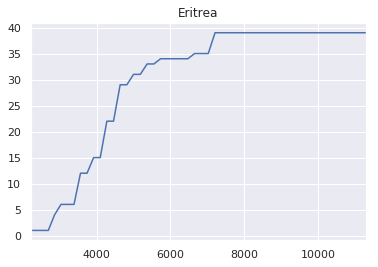

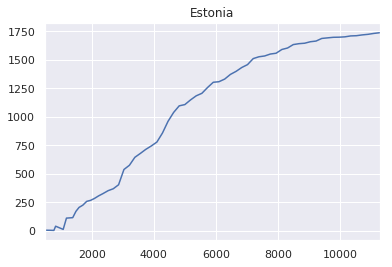

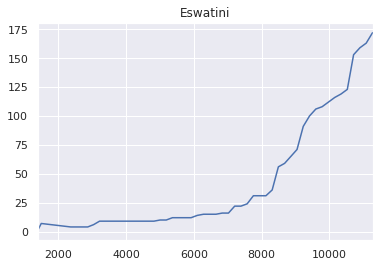

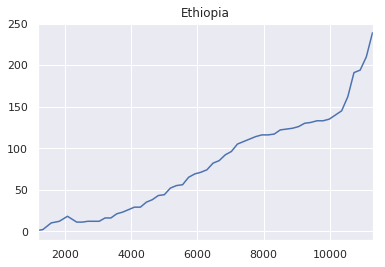

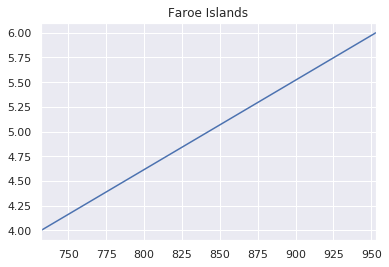

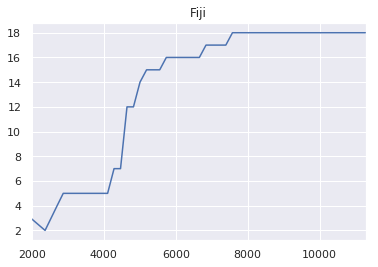

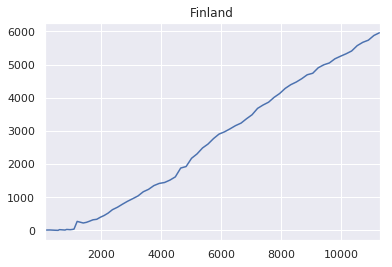

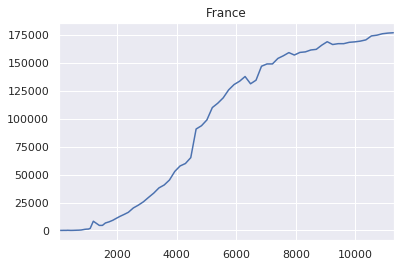

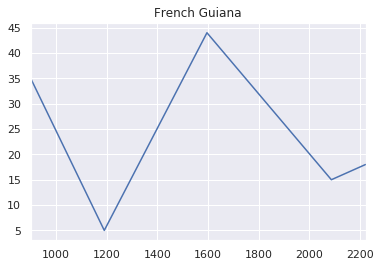

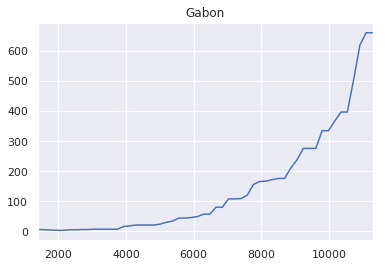

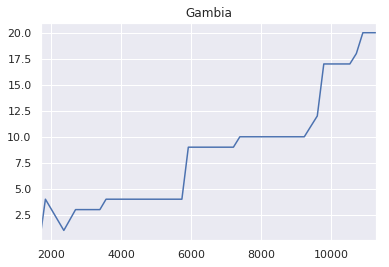

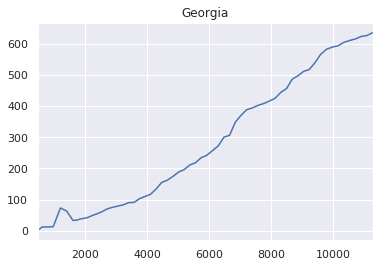

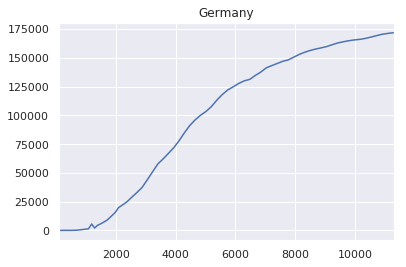

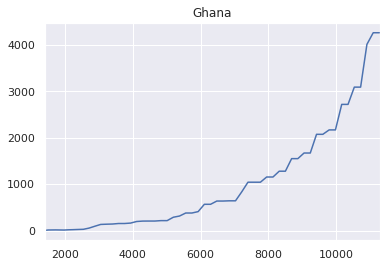

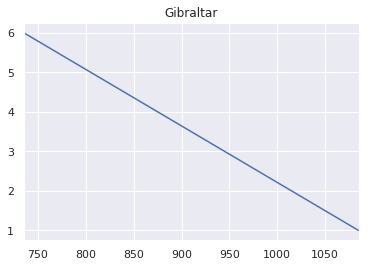

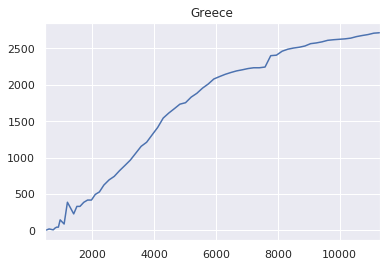

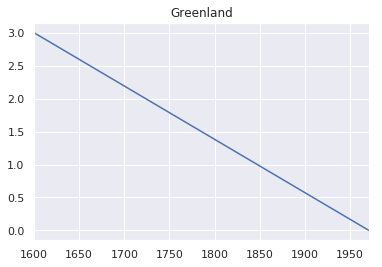

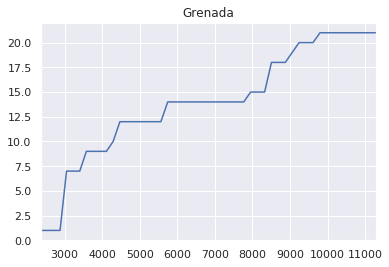

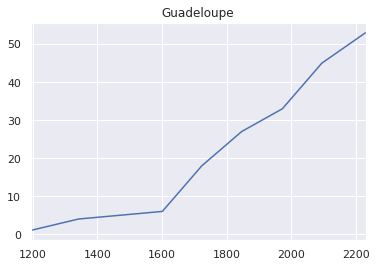

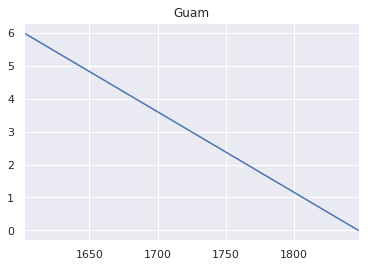

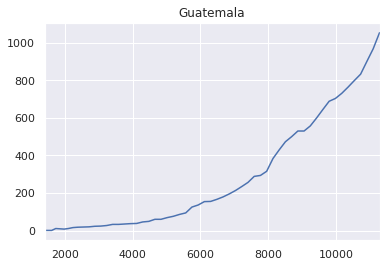

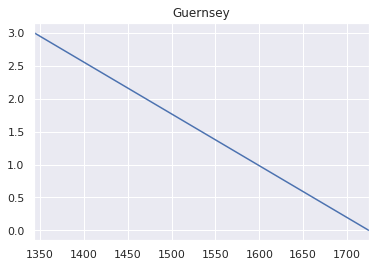

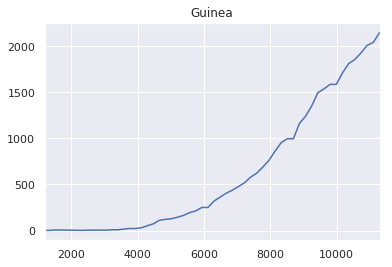

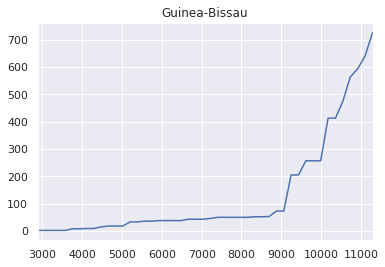

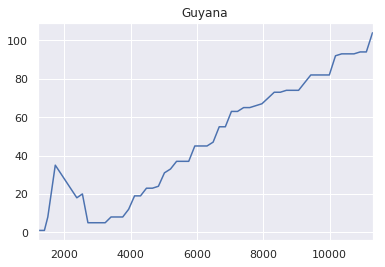

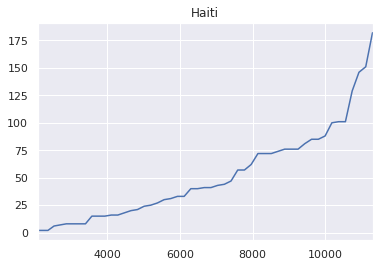

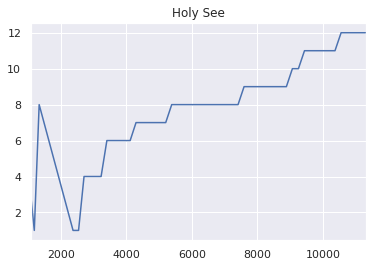

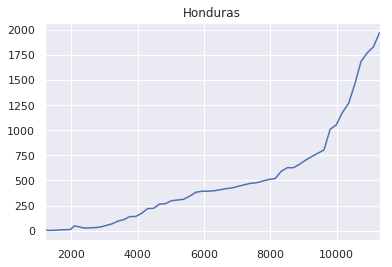

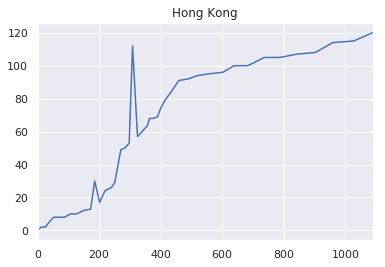

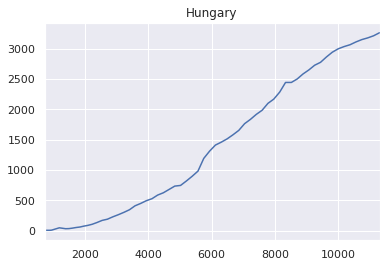

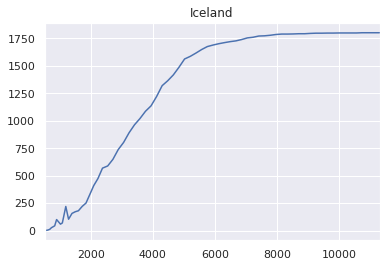

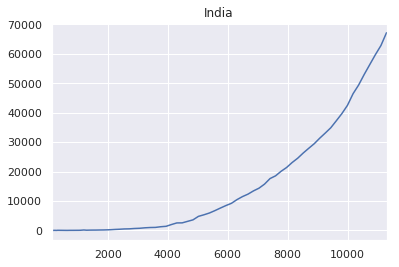

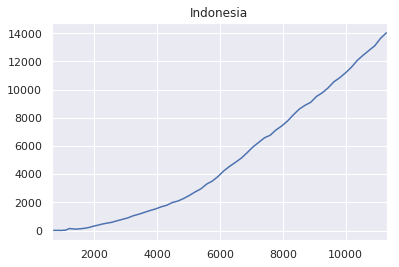

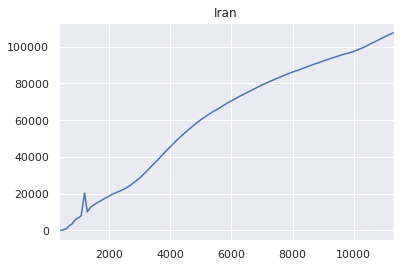

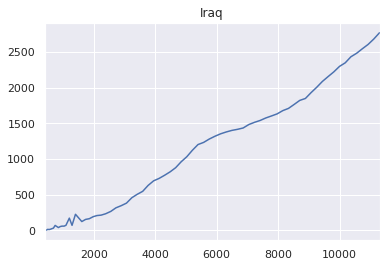

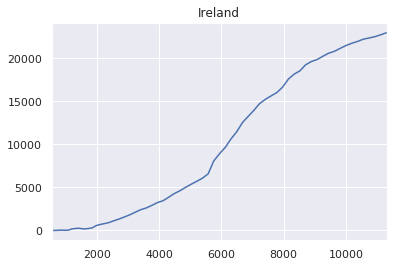

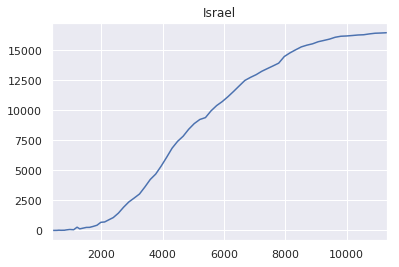

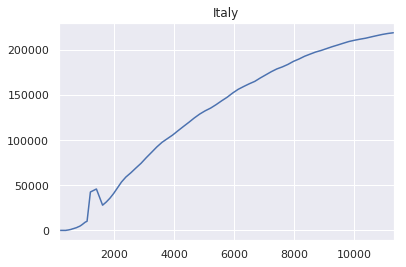

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=70.0, right=70.0
  ax.set_xlim(left, right)


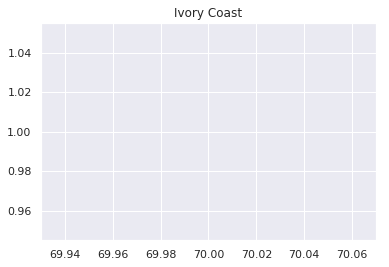

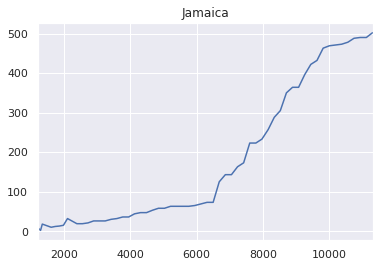

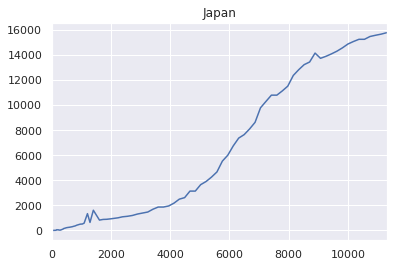

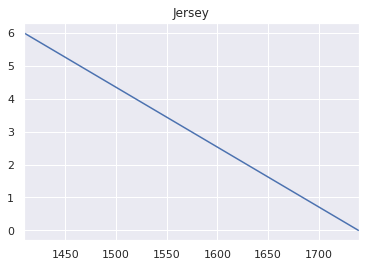

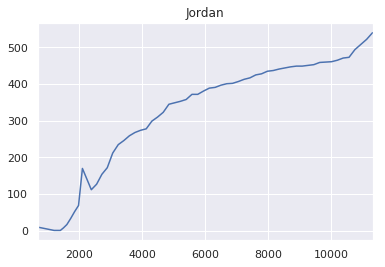

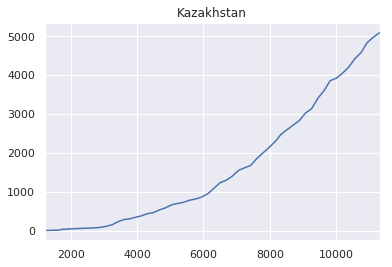

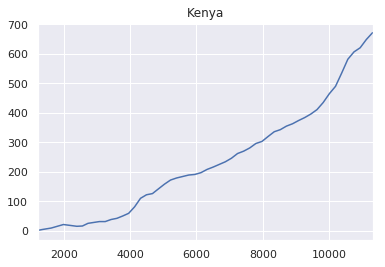

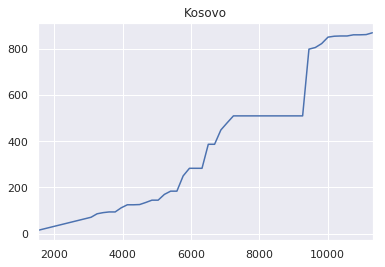

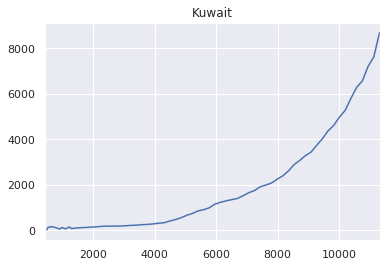

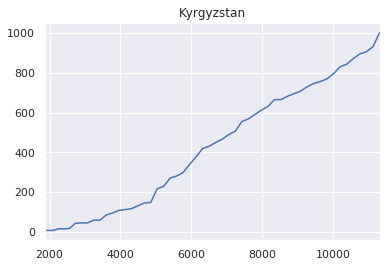

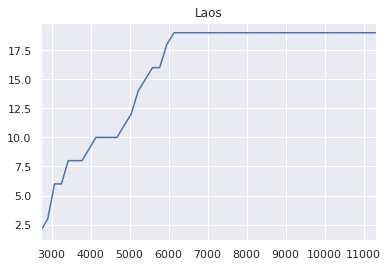

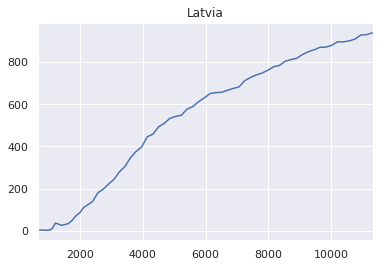

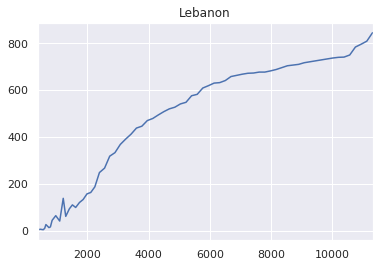

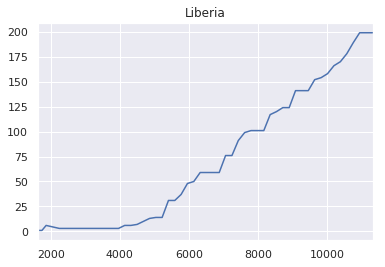

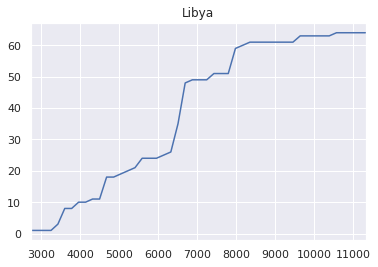

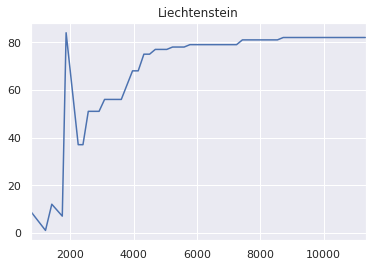

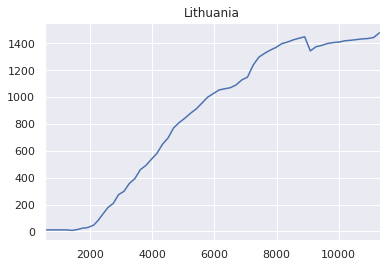

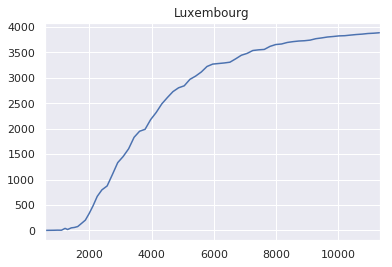

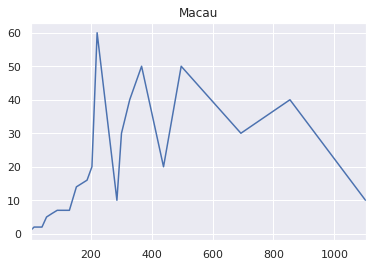

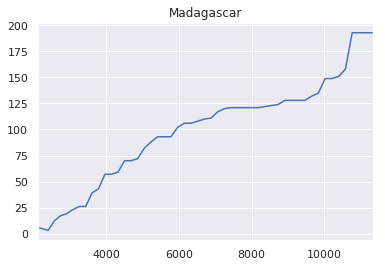

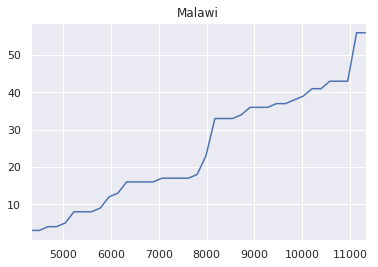

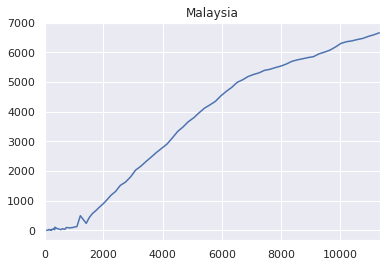

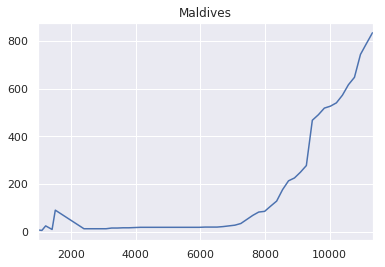

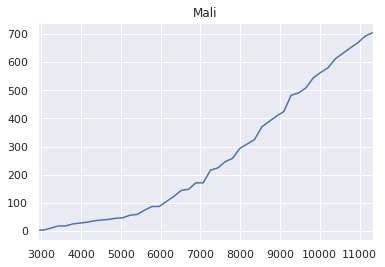

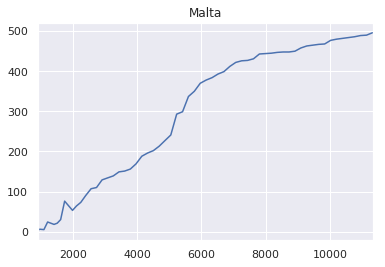

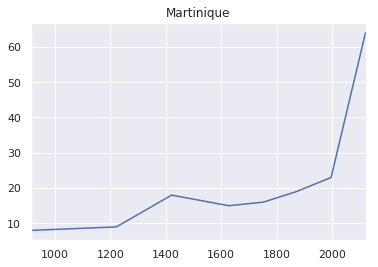

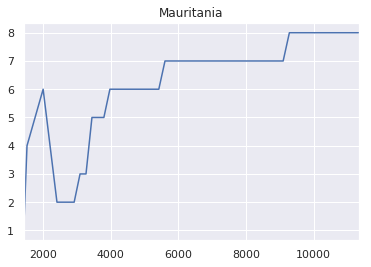

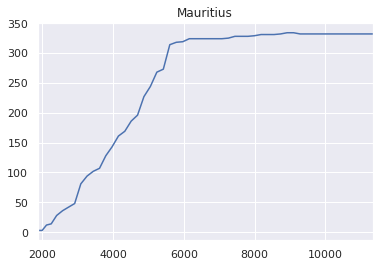

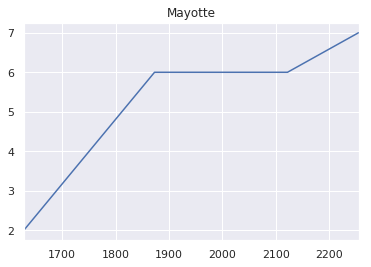

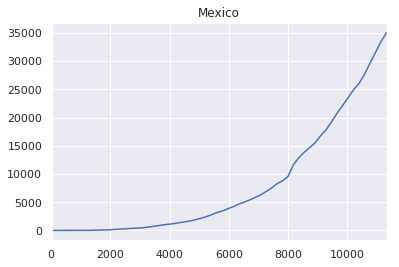

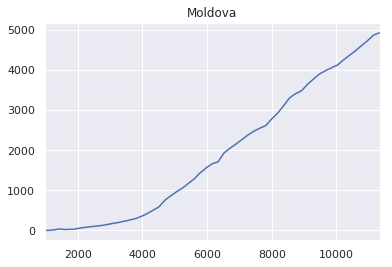

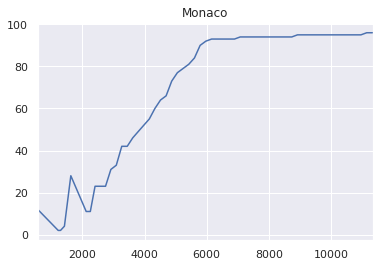

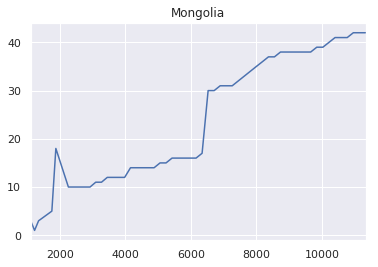

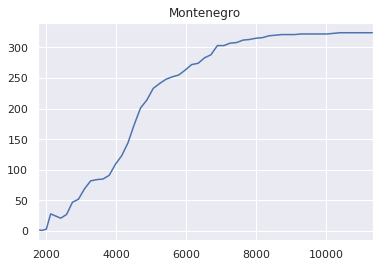

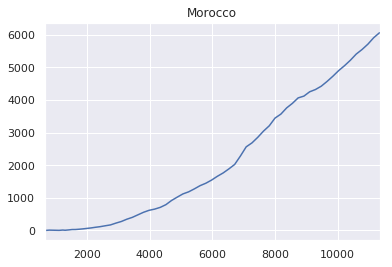

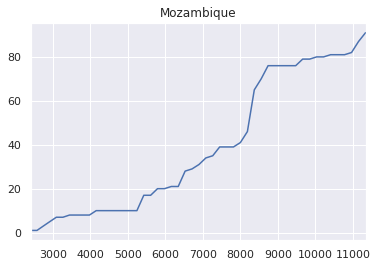

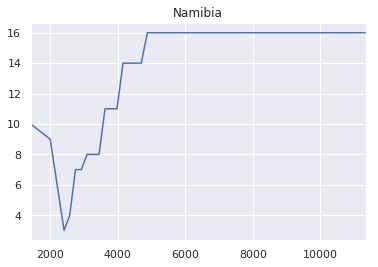

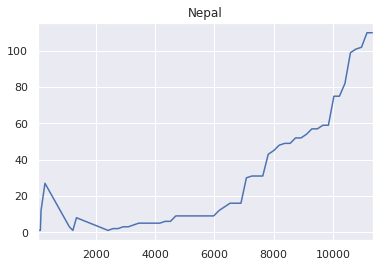

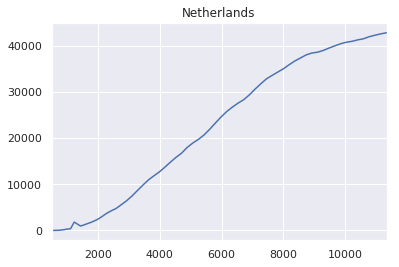

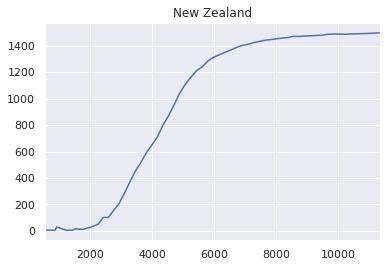

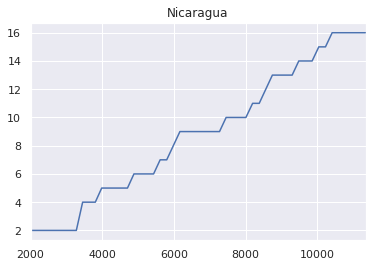

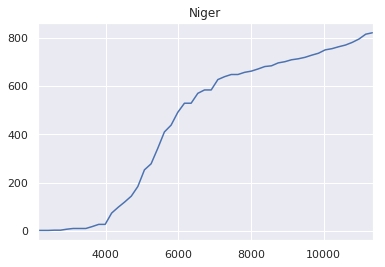

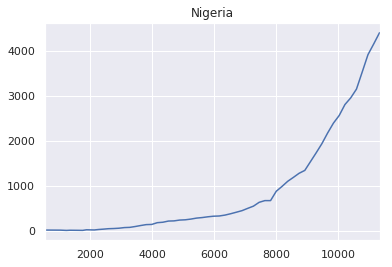

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=532.0, right=532.0
  ax.set_xlim(left, right)


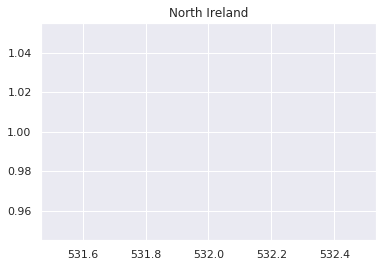

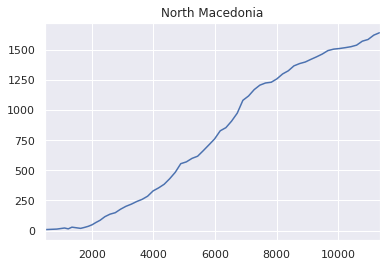

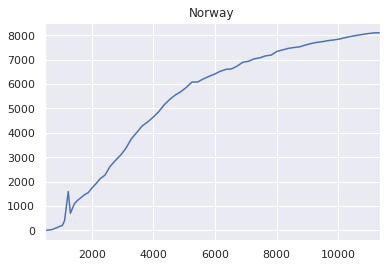

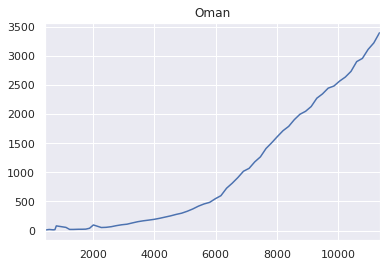

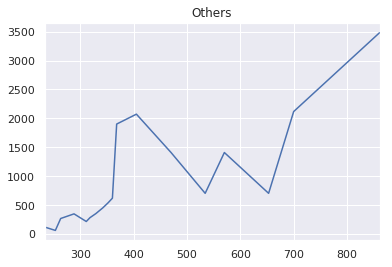

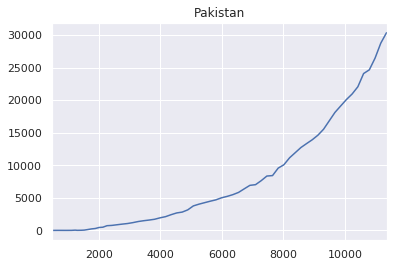

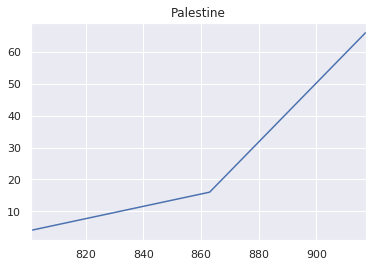

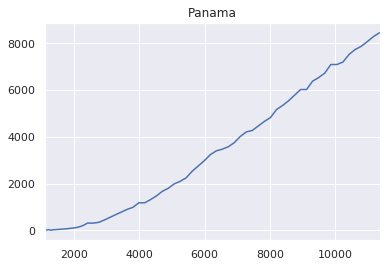

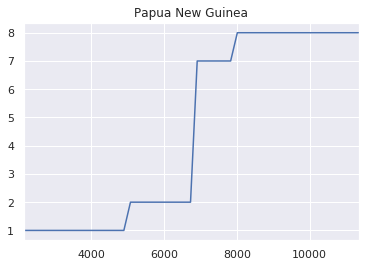

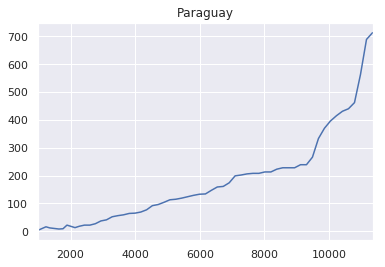

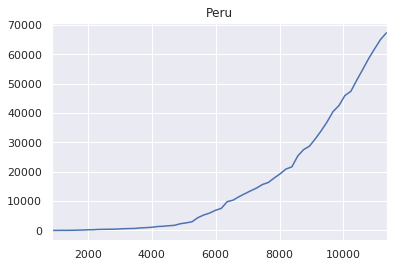

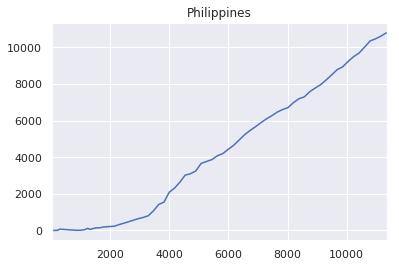

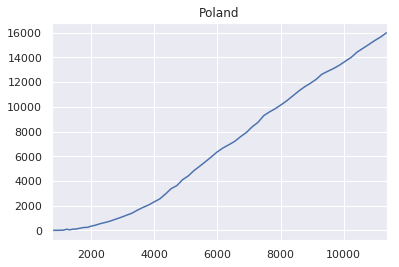

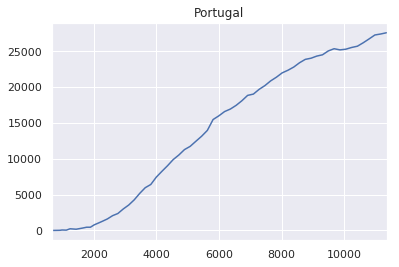

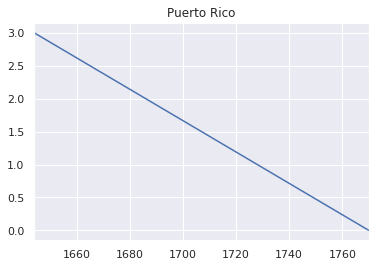

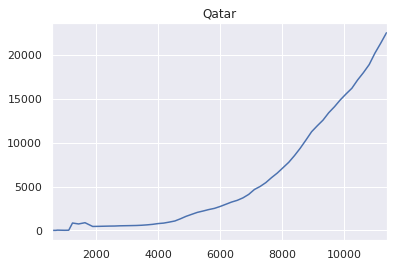

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=987.0, right=987.0
  ax.set_xlim(left, right)


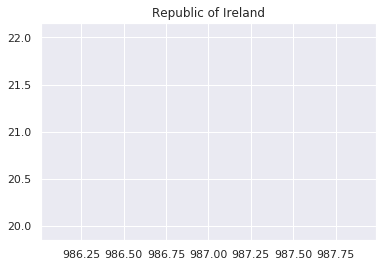

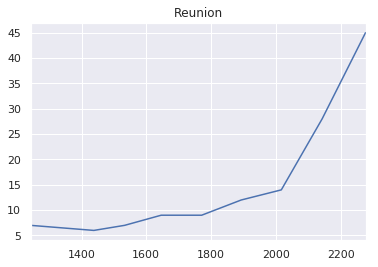

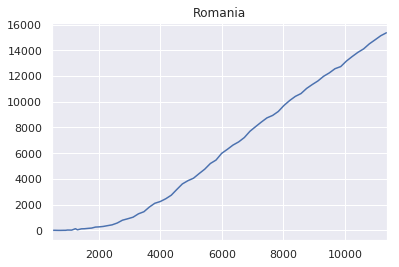

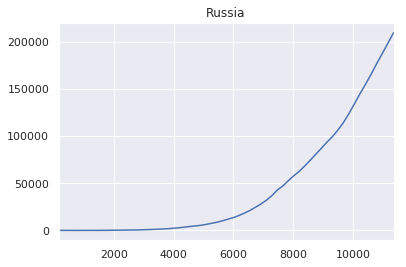

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1123.0, right=1123.0
  ax.set_xlim(left, right)


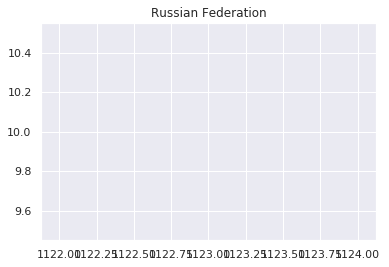

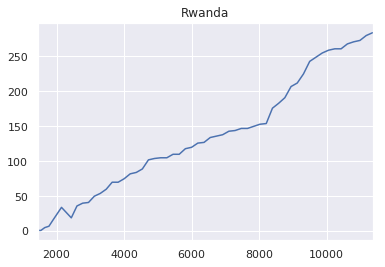

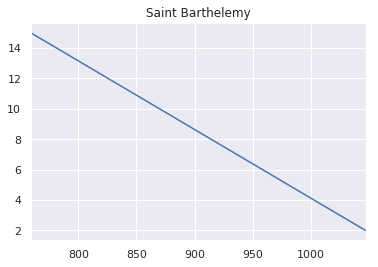

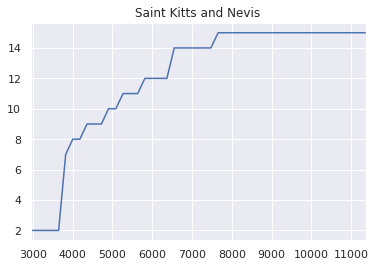

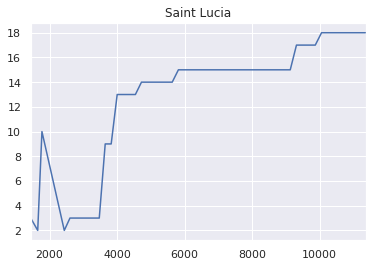

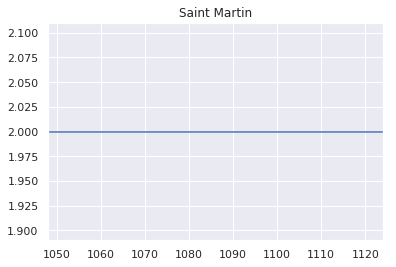

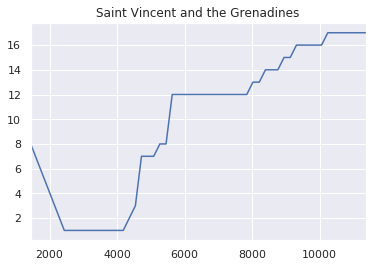

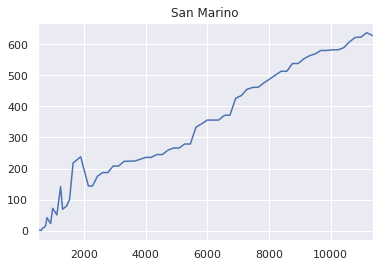

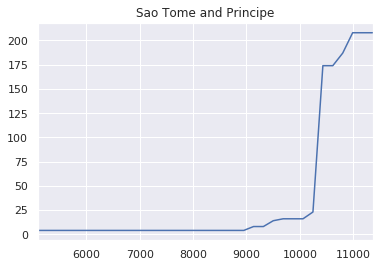

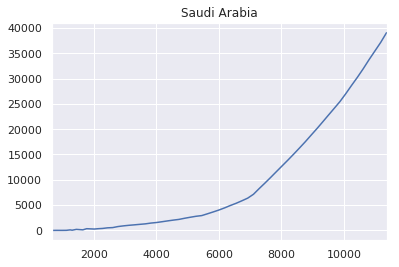

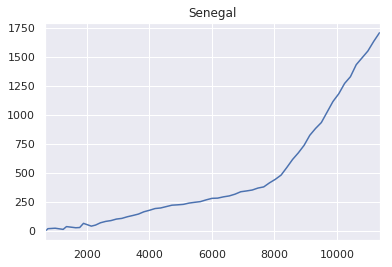

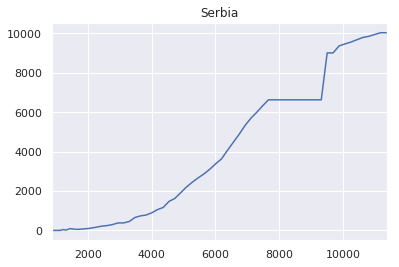

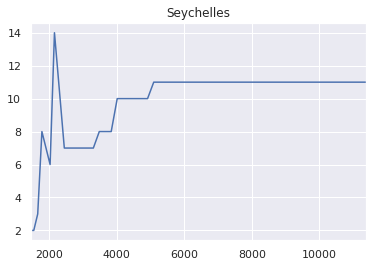

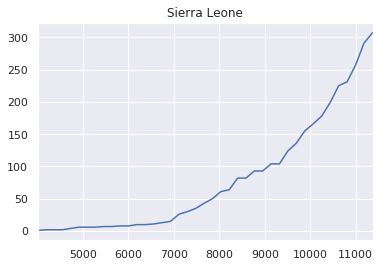

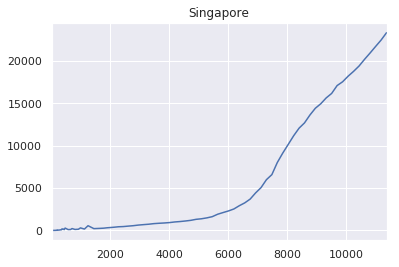

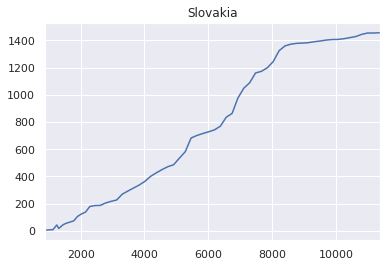

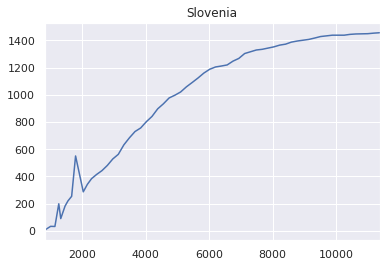

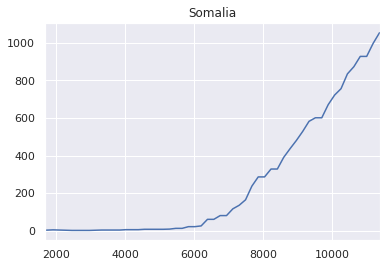

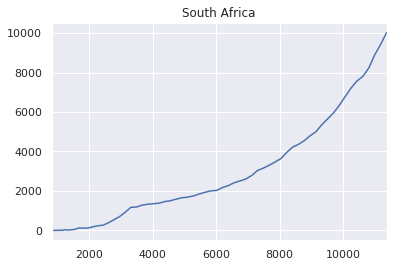

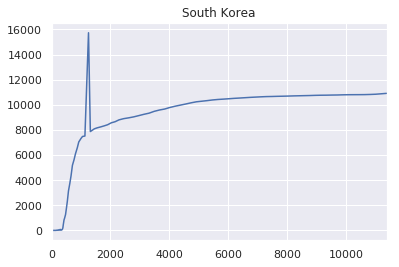

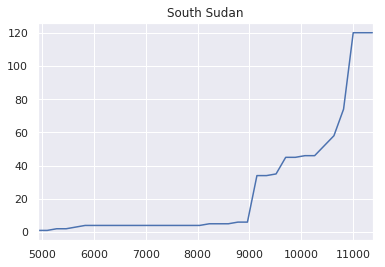

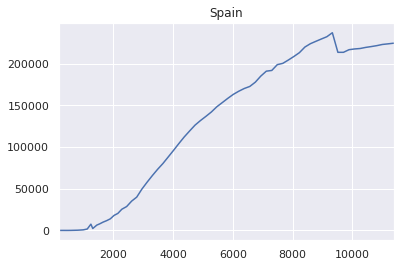

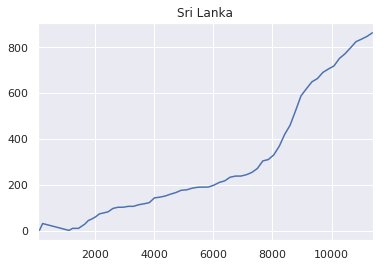

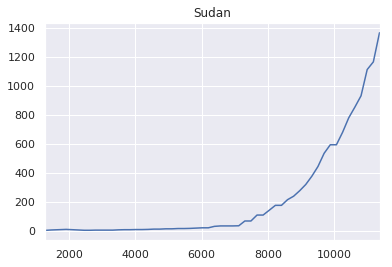

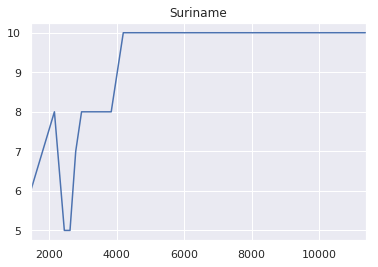

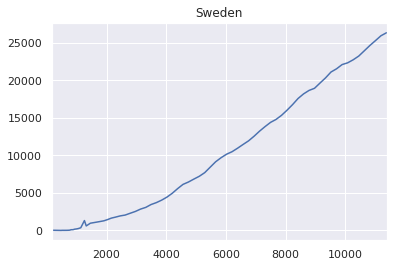

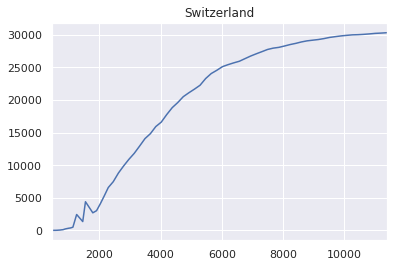

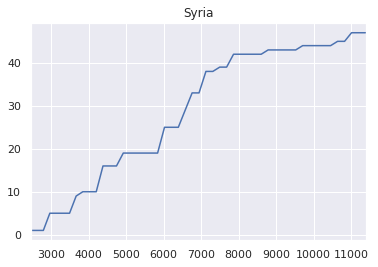

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1137.0, right=1137.0
  ax.set_xlim(left, right)


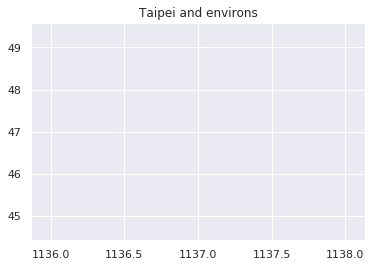

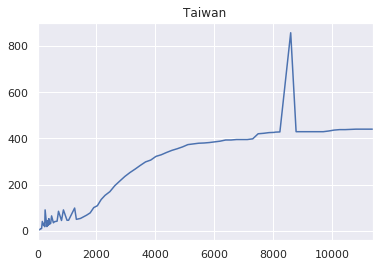

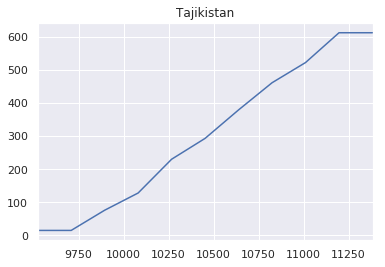

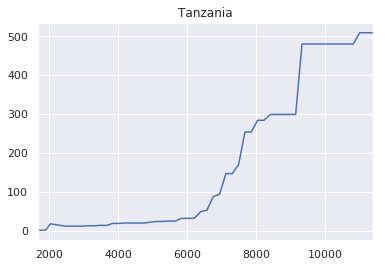

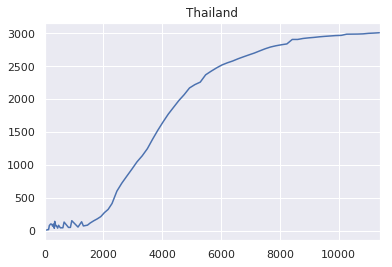

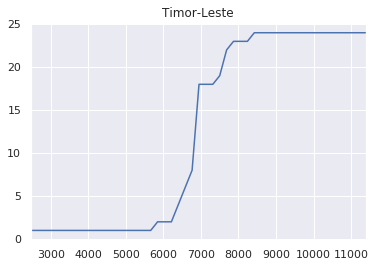

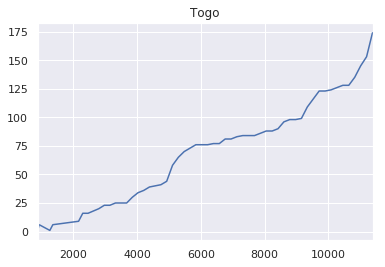

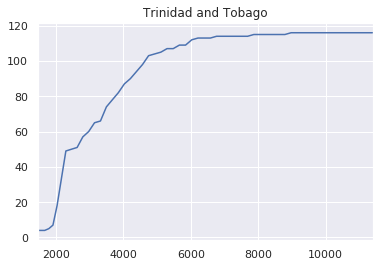

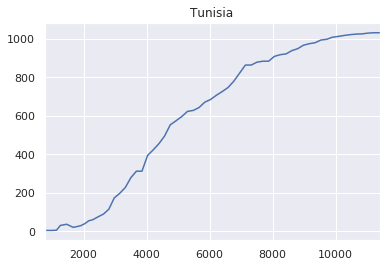

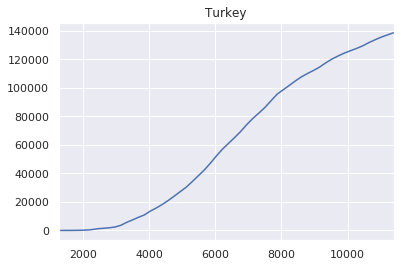

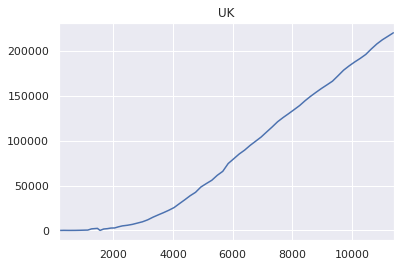

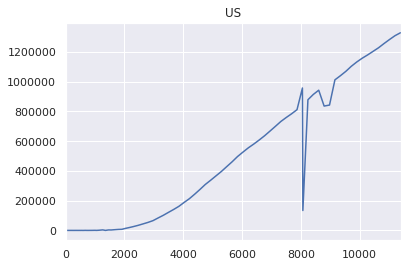

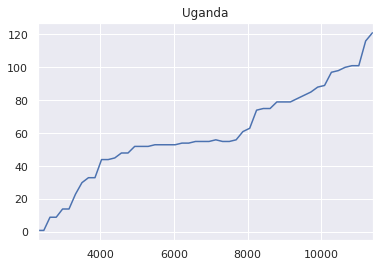

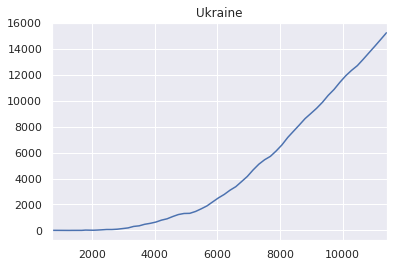

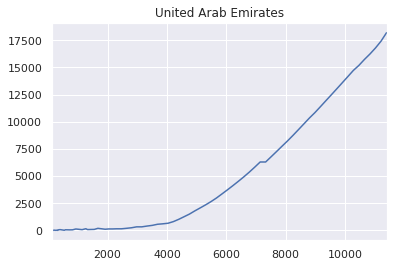

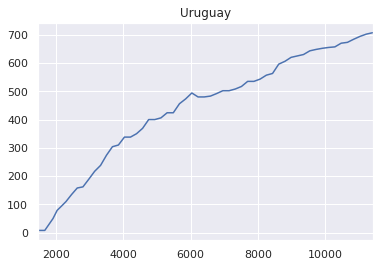

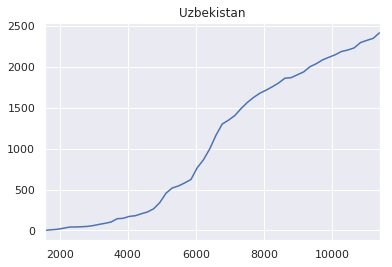

/home/caro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=884.0, right=884.0
  ax.set_xlim(left, right)


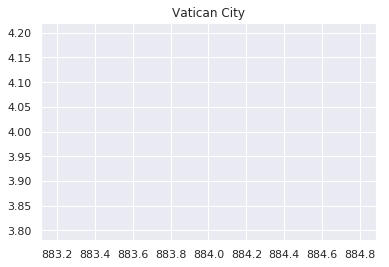

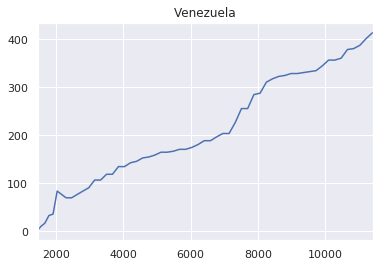

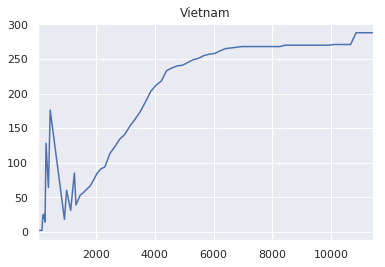

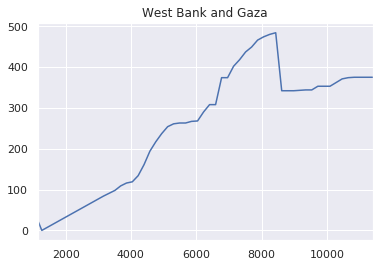

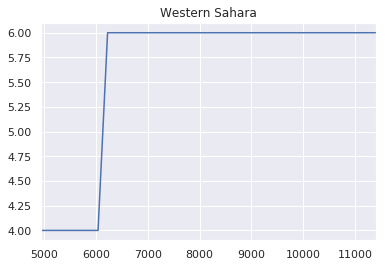

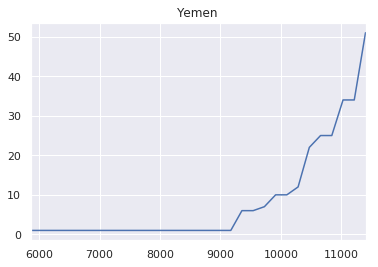

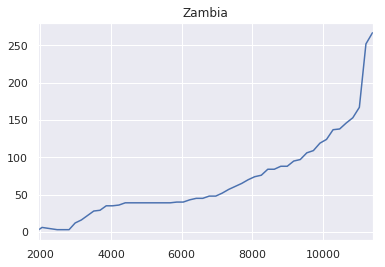

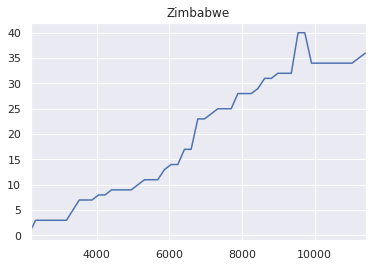

In [36]:
for country in countries_list:
    clean[clean.Country==country].Confirmed.plot()
    plt.title(country)
    plt.show()

In [ ]:
Cape Verde, Channel Islands, Curacao, East Timor, Ivory Coast, North Ireland, Republic of Ireland, Taipei and environs, vatican city
Cruise Ship, China, Hong Kong, Macau, south korea, taiwan, vietnam, west bank

In [54]:
clean.groupby('Country').Recovered.count().describe()

count    217.000000
mean      52.557604
std       23.289595
min        1.000000
25%       50.000000
50%       56.000000
75%       64.000000
max      111.000000
Name: Recovered, dtype: float64

I will keep only countries with more than 50 data points.

In [68]:
n_points = clean.groupby('Country').Recovered.count().to_dict()
points = dict((k,str(v)) for k,v in n_points.items())

In [69]:
clean['n_points'] = clean['Country']

In [70]:
clean['n_points'].replace(points,inplace=True)

In [71]:
clean.head()

,Date,Country,Confirmed,Deaths,Recovered,n_points
0,2020-01-22,China,547.0,17.0,28.0,111
1,2020-01-22,Hong Kong,0.0,0.0,0.0,47
2,2020-01-22,Japan,2.0,0.0,0.0,104
3,2020-01-22,Macau,1.0,0.0,0.0,22
4,2020-01-22,South Korea,1.0,0.0,0.0,104


In [78]:
clean['n_points']=pd.to_numeric(clean.n_points)

In [81]:
data = clean[clean.n_points >= 50]

In [82]:
data.groupby('Country').Recovered.count().describe()

count    167.000000
mean      62.808383
std       11.646880
min       50.000000
25%       54.000000
50%       61.000000
75%       67.000000
max      111.000000
Name: Recovered, dtype: float64